# Analyzing remapping across contexts 

In [1]:
#import ipympl
import matplotlib.pyplot as plt

import scipy as sp
import scipy.io
import numpy as np
import os
os.sys.path.append('../behavior')
os.sys.path.append('../')
from behavior_analysis import process_data as pd
from behavior_analysis import loadmat_sbx

import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas 

from utilities import load_ca_mat, trial_tensor, across_trial_avg
import utilities
from scipy.ndimage.filters import gaussian_filter

%load_ext autoreload
%autoreload 2
%matplotlib inline

C:\Users\mplitt\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
CaDataDir = "Z://2P_data/2AFC_V3/4058541.1/CA1/"
mouse = "4058541.1"
CaFiles = ["CA1_001_004", "CA1_002_008", "CA1_003_002","CA1_004_002","CA1_005_001"] 
vr_dir = "Z://VR/2AFC_V3/"
BehaviorFiles = ["1_imaging_","2_imaging_3_",  "3_", "4_imaging_", "5_imaging_"]

In [3]:
vr_dir = "Z://VR/2AFC_V3/"
mouse = "4058541.3"
CaDataDir = "Z://2P_data/2AFC_V3/" + mouse + "/CA1//"
CaFiles = ["CA1_001_002" ,"CA1_002_002", "CA1_003_002","CA1_004_001","CA1_005_002"] 
BehaviorFiles = ["1_imaging_",  "2_", "3_", "4_imaging_", "5_imaging_"]


In [4]:
sessions, Behavior, C_list = [],[],[]

for i in range(len(CaFiles)):
    info = loadmat_sbx(CaDataDir + "/rawDat/" + CaFiles[i] + ".mat")['info']
    sess = "2AFC_Test_PostSurg_" + BehaviorFiles[i]
    m = pd(mouse,sess,basedir='work')
    if mouse=="4058541.3":
        behavior,tstart_inds,reward_inds,first_lick_inds = m.align_to_ca(sess,info,nplanes=2)
    else:
        behavior,tstart_inds,reward_inds,first_lick_inds = m.align_to_ca(sess,info,nplanes=1)
    
    fname= CaDataDir+ CaFiles[i] +"_cnmf_results.mat"
    print(fname)
    ca_dat = load_ca_mat(fname)
    
    C = ca_dat['C_dec'][behavior['ca_inds'].values,:]
    
    sessions.append(sess)
    Behavior.append(behavior)
    C_list.append(C)
    
    

Z://2P_data/2AFC_V3/4058541.3/CA1///rawDat/CA1_001_002.mat
(246,)
(246,)
(245, 4)
Z://2P_data/2AFC_V3/4058541.3/CA1//CA1_001_002_cnmf_results.mat
#subsystem#not made into numpy array
Z://2P_data/2AFC_V3/4058541.3/CA1///rawDat/CA1_002_002.mat
(246,)
(246,)
(245, 4)
Z://2P_data/2AFC_V3/4058541.3/CA1//CA1_002_002_cnmf_results.mat
#subsystem#not made into numpy array
Z://2P_data/2AFC_V3/4058541.3/CA1///rawDat/CA1_003_002.mat
(246,)
(246,)
(245, 4)
Z://2P_data/2AFC_V3/4058541.3/CA1//CA1_003_002_cnmf_results.mat
#subsystem#not made into numpy array
Z://2P_data/2AFC_V3/4058541.3/CA1///rawDat/CA1_004_001.mat
(246,)
(246,)
(245, 4)
Z://2P_data/2AFC_V3/4058541.3/CA1//CA1_004_001_cnmf_results.mat
#subsystem#not made into numpy array
Z://2P_data/2AFC_V3/4058541.3/CA1///rawDat/CA1_005_002.mat
(246,)
(246,)
(245, 4)
Z://2P_data/2AFC_V3/4058541.3/CA1//CA1_005_002_cnmf_results.mat
#subsystem#not made into numpy array


## Plot all cells firing rate map on the left with significant place cells on the right. 
Plot sessions independently

(884,)
(1181,)
(1355,)
(1170,)
(1247,)


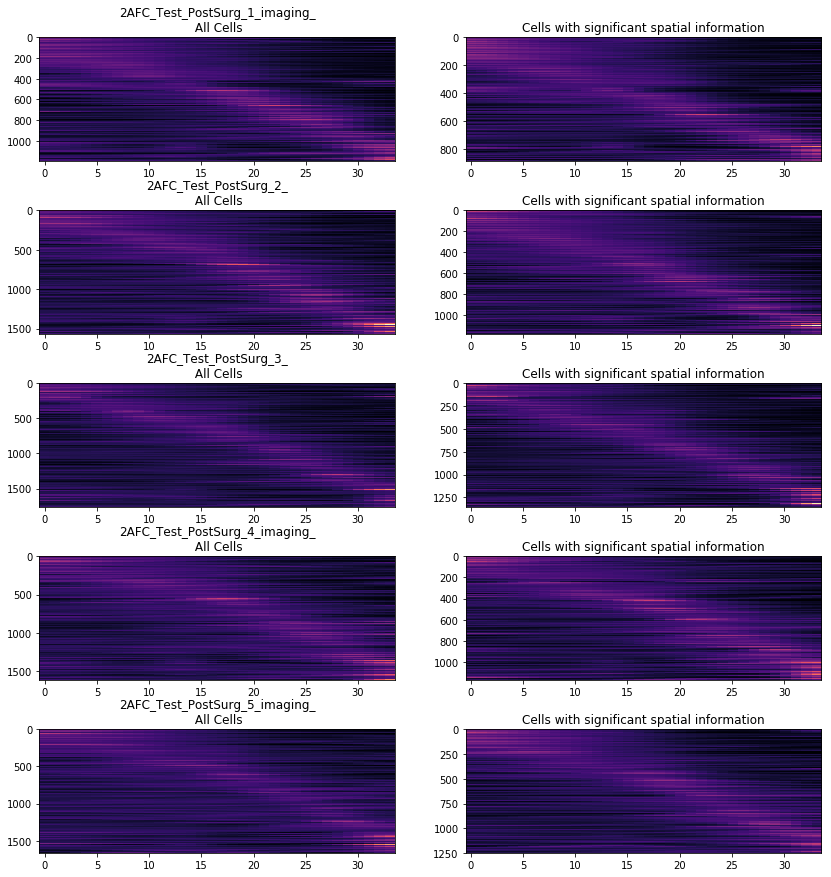

In [6]:
f,ax = plt.subplots(len(CaFiles),2,figsize=[14,15])
f.subplots_adjust(hspace=.4)
p_whole_session = []
for i in range(len(CaFiles)):
    C, behavior = C_list[i], Behavior[i]
    
    frmap, occupancy = utilities.rate_map(C,behavior['position'].values)

    maxInds = np.argmax(frmap,axis=0)
    normMat = np.zeros(frmap.shape)
    for j in range(frmap.shape[1]):
        normMat[:,j] = gaussian_filter(frmap[:,j],2)/frmap[:,j].sum()
    sortVec = np.argsort(maxInds)
    #f,ax = plt.subplots(1,1)
    ax[i,0].imshow(normMat[:,sortVec].T,aspect='auto',cmap='magma')
    ax[i,0].set_title(sessions[i]+ "\n All Cells")
    si = utilities.spatial_info(frmap,occupancy)
    #SI.append(si)
    p = utilities.spatial_info_perm_test(si,C,behavior['position'].values,nperms = 100)
    p_whole_session.append(p)
    print(np.where(p>.9)[0].shape)
    frmap_sig = frmap[:,p>.9]
    maxInds = np.argmax(frmap_sig,axis=0)
    normMat = np.zeros(frmap_sig.shape)
    for j in range(frmap_sig.shape[1]):
        normMat[:,j] = gaussian_filter(frmap_sig[:,j],2)/frmap_sig[:,j].sum()
    sortVec = np.argsort(maxInds)
    ax[i,1].imshow(normMat[:,sortVec].T,aspect='auto',cmap='magma')
    ax[i,1].set_title("Cells with significant spatial information")

## Find cells with fields in one context and sort the same cells in the other context by their order
### see how well structure is retained

(6937,)
(6937, 1195) (6937,)
(7673,)
(7673, 1195) (7673,)
(7587,)
(7587, 1568) (7587,)
(7542,)
(7542, 1568) (7542,)
(7269,)
(7269, 1762) (7269,)
(6624,)
(6624, 1762) (6624,)
(6966,)
(6966, 1613) (6966,)
(6451,)
(6451, 1613) (6451,)
(7416,)
(7416, 1661) (7416,)
(7391,)
(7391, 1661) (7391,)


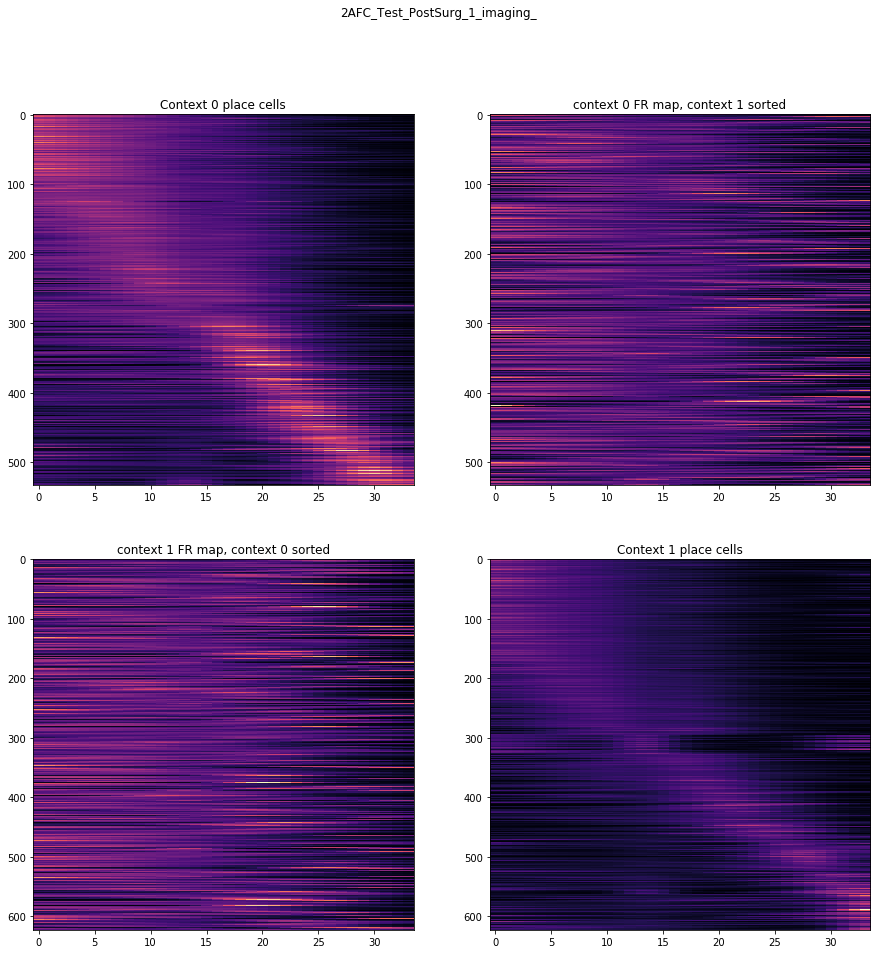

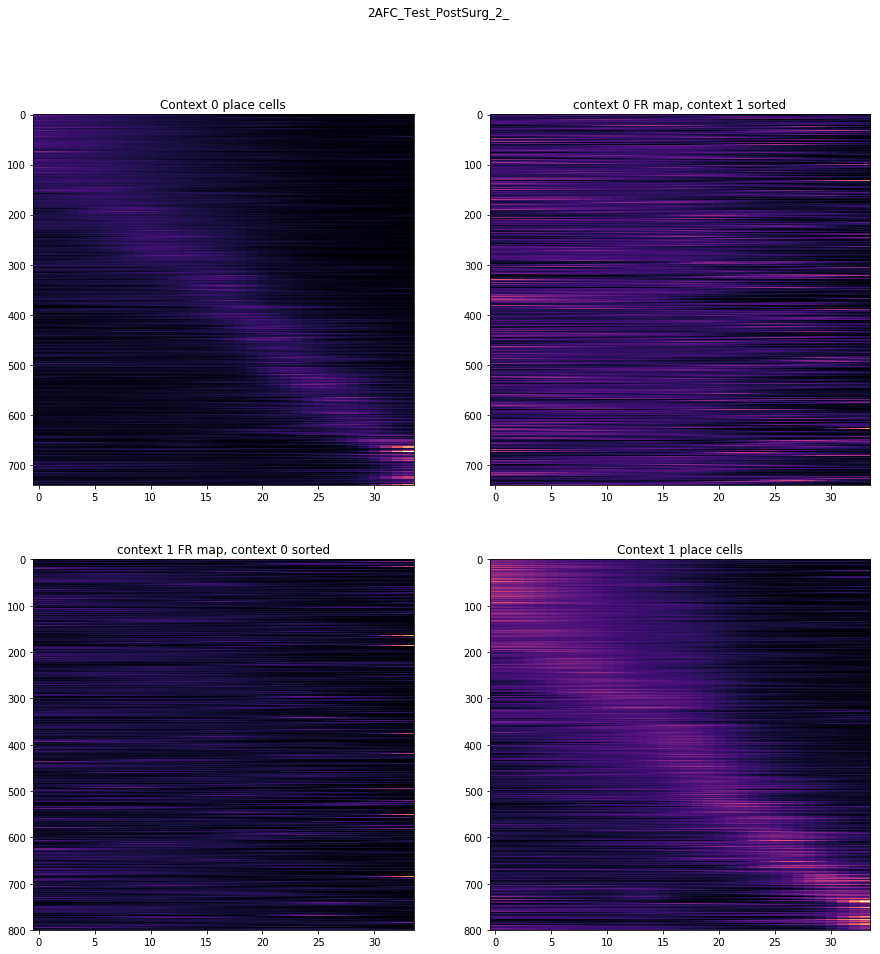

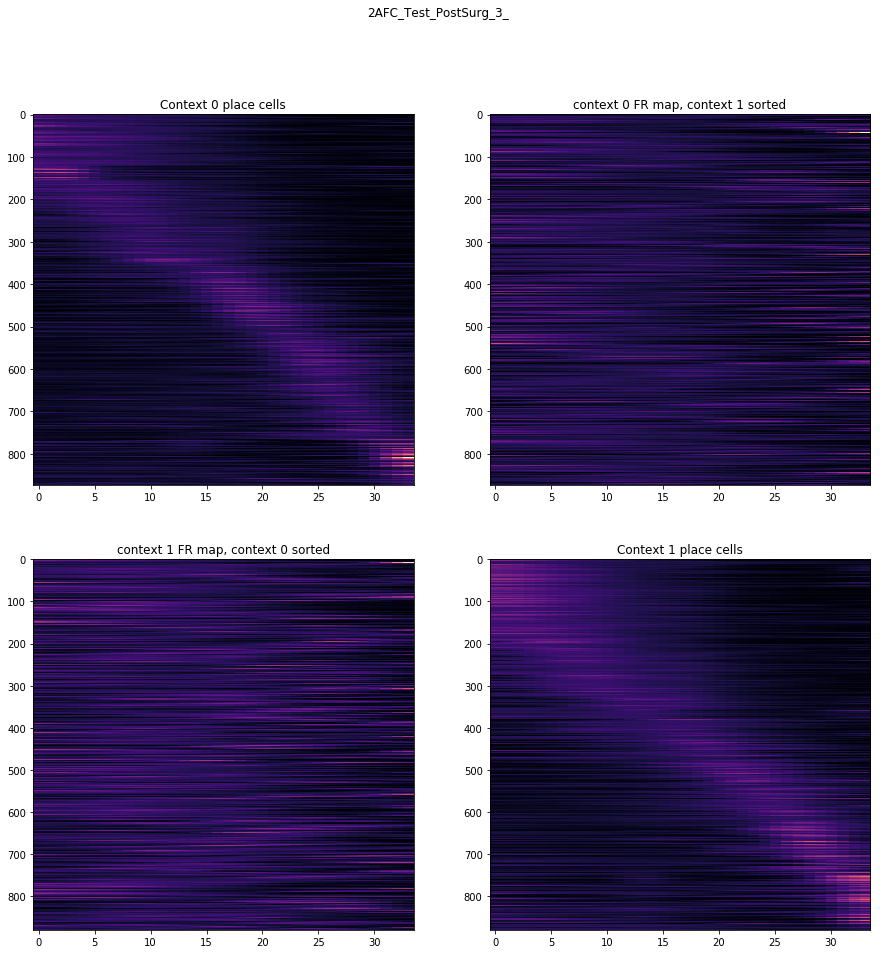

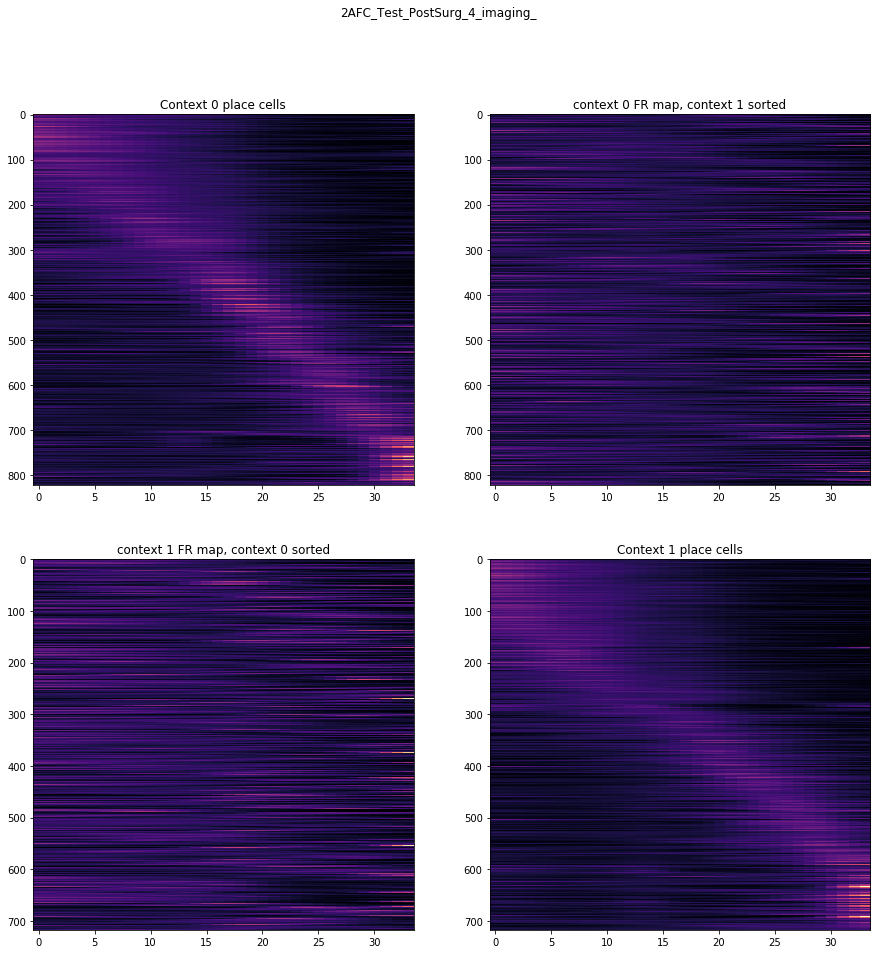

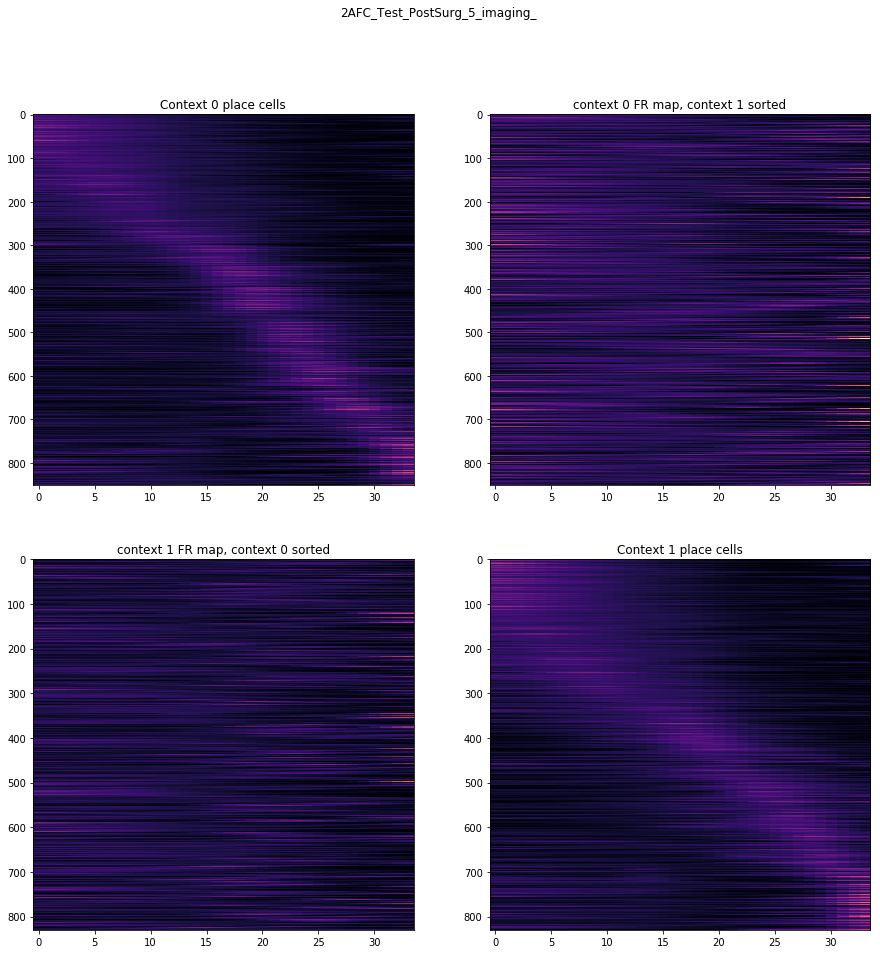

In [7]:
P,SI, FRmap = {},{},{}
for i in range(len(CaFiles)):
    C, behavior = C_list[i], Behavior[i]
    f,ax = plt.subplots(2,2,figsize=[15,15])
    plt.suptitle(sessions[i])
    P[i],SI[i], FRmap[i] = [],[],[]
    for val in [0, 1]:
        mask = behavior['morph'].values==val
        print(np.where(mask)[0].shape)
        print(C[mask,:].shape,behavior['position'].values[mask].shape)
        frmap, occupancy = utilities.rate_map(C[mask,:],behavior['position'].values[mask])
        si = utilities.spatial_info(frmap,occupancy)
        p = utilities.spatial_info_perm_test(si,C[mask,:],behavior['position'].values[mask],nperms = 100)
        
        P[i].append(p)
        SI[i].append(si)
        FRmap[i].append(frmap)
    
        frmap_sig = frmap[:,p>.95]
        maxInds = np.argmax(frmap_sig,axis=0)
        normMat = np.zeros(frmap_sig.shape)
        for j in range(frmap_sig.shape[1]):
            normMat[:,j] = gaussian_filter(frmap_sig[:,j],2)/frmap_sig[:,j].sum()
        sortVec = np.argsort(maxInds)
        ax[val,val].imshow(normMat[:,sortVec].T,aspect='auto',cmap='magma')
        ax[val,val].set_title("Context %i place cells" % val)
        
        mask_other = behavior['morph'].values == np.abs(val-1)
        frmap_other,occ_other = utilities.rate_map(C[mask_other,:],behavior['position'].values[mask_other])
        frmap_other_sig = frmap_other[:,p>.95]
        
        
        normMat_other = np.zeros(frmap_other_sig.shape)
        for j in range(frmap_other_sig.shape[1]):
            normMat_other[:,j] = gaussian_filter(frmap_other_sig[:,j],2)/frmap_other_sig[:,j].sum()
            
        normMat_other_sort = normMat_other[:,sortVec]
        ax[val,int(np.abs(val-1))].imshow(normMat_other_sort[:,sortVec].T,aspect='auto',cmap='magma')
        ax[val,int(np.abs(val-1))].set_title("context %i FR map, context %i sorted" % (val, int(np.abs(val-1))))
        
        # add plot below rate maps showing where density of new place fields are
        
        
        
    

# Calculate overlap of place cells

2AFC_Test_PostSurg_1_imaging_
percent of all place cells that are common to 2 contexts 0.434243
percent of context 0 place cells that are common to 2 contexts 0.656660
percent of context 1 place cells that are common to 2 contexts 0.561798



2AFC_Test_PostSurg_2_
percent of all place cells that are common to 2 contexts 0.441534
percent of context 0 place cells that are common to 2 contexts 0.636977
percent of context 1 place cells that are common to 2 contexts 0.590000



2AFC_Test_PostSurg_3_
percent of all place cells that are common to 2 contexts 0.423701
percent of context 0 place cells that are common to 2 contexts 0.597254
percent of context 1 place cells that are common to 2 contexts 0.593182



2AFC_Test_PostSurg_4_imaging_
percent of all place cells that are common to 2 contexts 0.441534
percent of context 0 place cells that are common to 2 contexts 0.573512
percent of context 1 place cells that are common to 2 contexts 0.657382



2AFC_Test_PostSurg_5_imaging_
percent of all

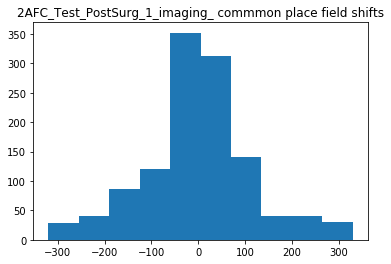

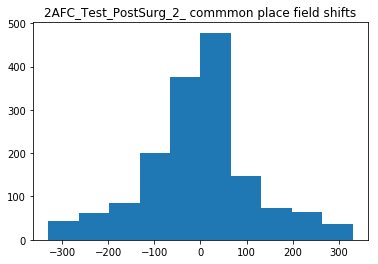

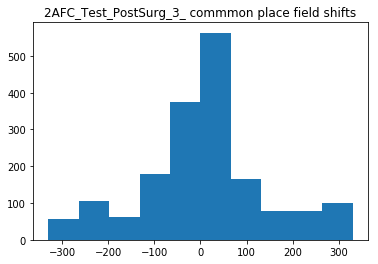

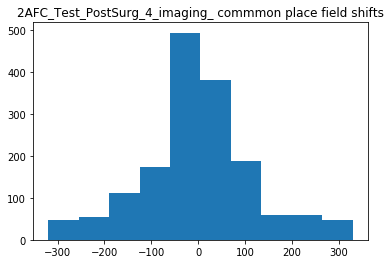

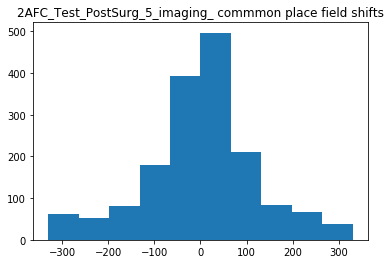

In [8]:
# calculate fraction of cells that are place cells in both contexts

for i in range(len(CaFiles)):
    f,ax = plt.subplots()
    print(sessions[i])
    C, behavior = C_list[i], Behavior[i]
    ps, sis, frmaps = P[i],SI[i],FRmap[i]
    
    pc_any = np.where((ps[0]>.95) | (ps[1]>.95))[0]
    common_pcs = np.where((ps[0]>.95) & (ps[1]>.95))[0]
    pc_0 = np.where(ps[0]>.95)[0]
    pc_1 = np.where(ps[1]>.95)[0]
    
    # percent of total place cells that are place cells in both environments
    print("percent of all place cells that are common to 2 contexts %f" % (np.float(common_pcs.shape[0])/np.float(pc_any.shape[0])))
    
    # percent of context 0 place cells that are common
    print("percent of context 0 place cells that are common to 2 contexts %f" % (np.float(common_pcs.shape[0])/np.float(pc_0.shape[0])))
    
    # percent of context 1 place cells that are common
    print("percent of context 1 place cells that are common to 2 contexts %f" % (np.float(common_pcs.shape[0])/np.float(pc_1.shape[0])))
    
    # histogram of center of mass shift across contexts
    bin_size, nbins = 10, frmaps[0].shape[0]
    bin_centers = np.arange(bin_size/2,nbins*bin_size,bin_size)
    
    frmaps_common = [maps[:,common_pcs] for maps in frmaps]
    coms = [bin_centers[np.argmax(maps,axis=0)] for maps in frmaps]
    shifts = coms[1]-coms[0]
    hist,edges = np.histogram(shifts)
    
    ax.hist(shifts)
    #ax.plot((edges[1:]+edges[0:-1])/2,hist/hist.sum())
    ax.set_title("%s commmon place field shifts" %sessions[i])
        
    
    print("\n\n")
        
# if place cell in both contexts, calculate shift in COM across the two contexts

2AFC_Test_PostSurg_1_imaging_
2AFC_Test_PostSurg_2_
2AFC_Test_PostSurg_3_
2AFC_Test_PostSurg_4_imaging_
2AFC_Test_PostSurg_5_imaging_


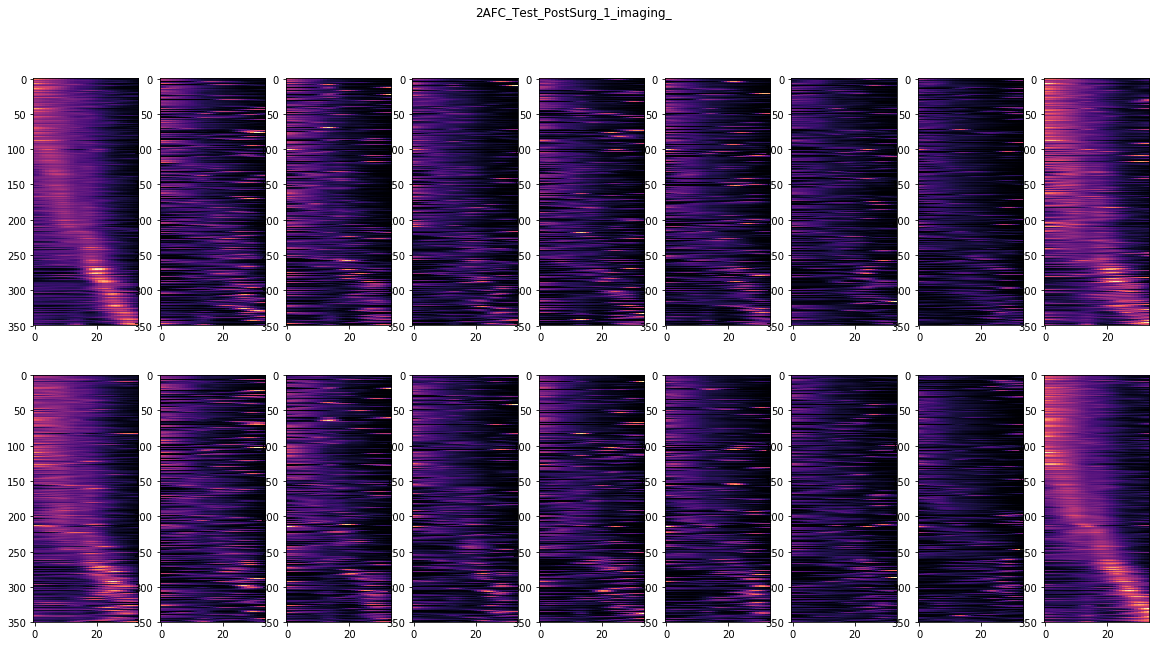

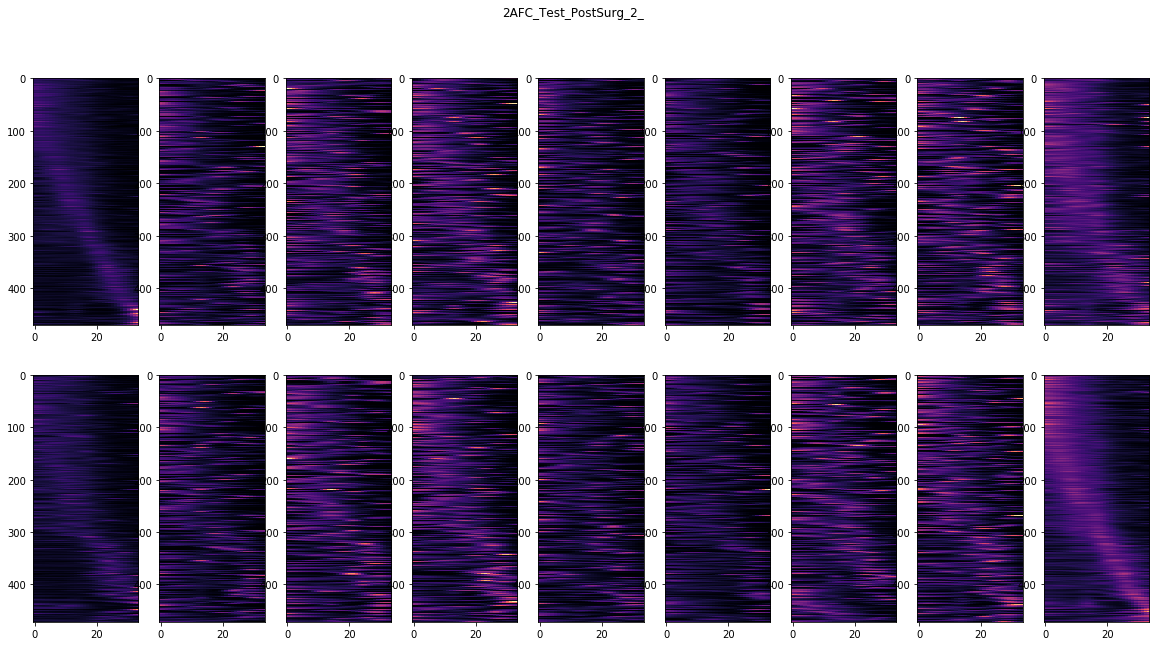

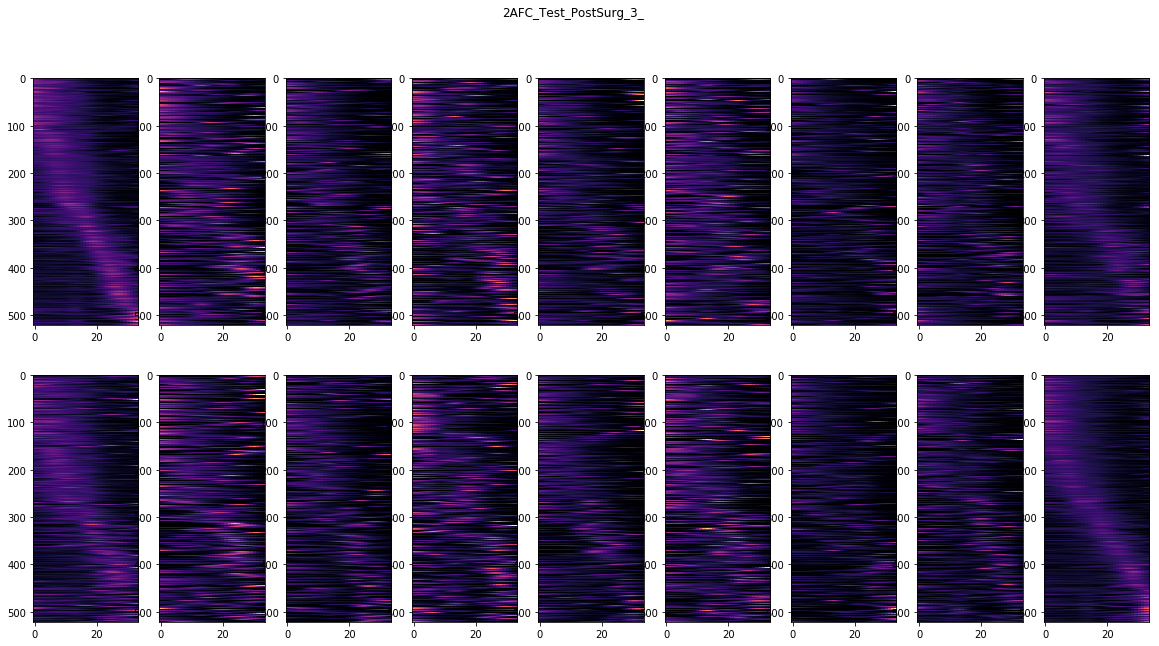

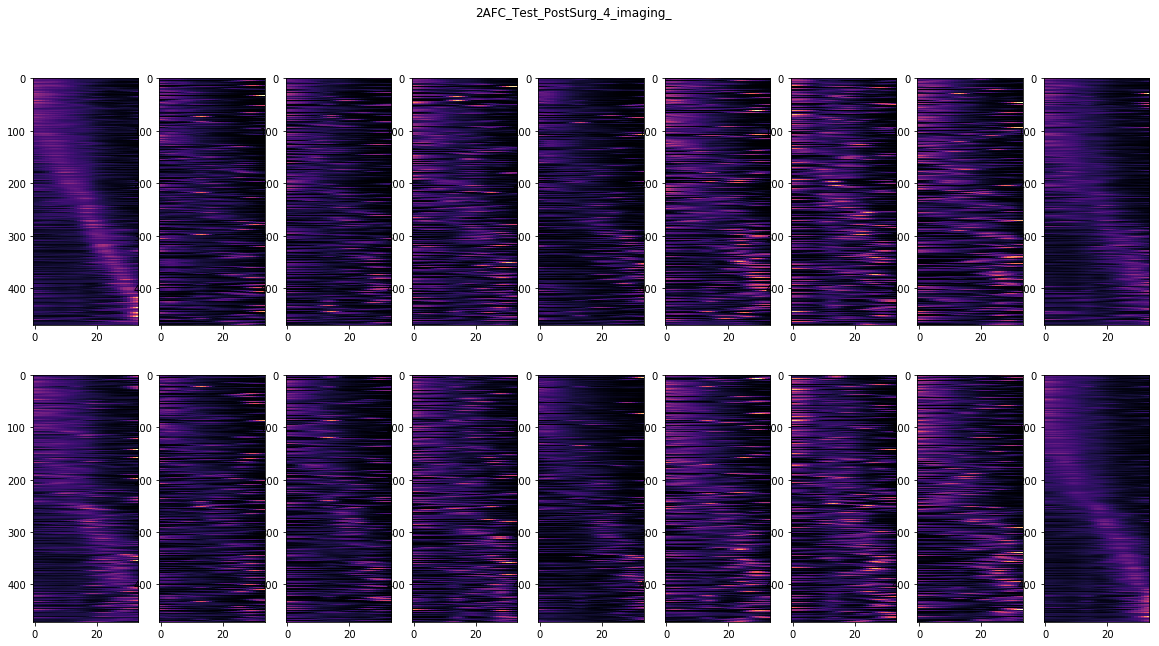

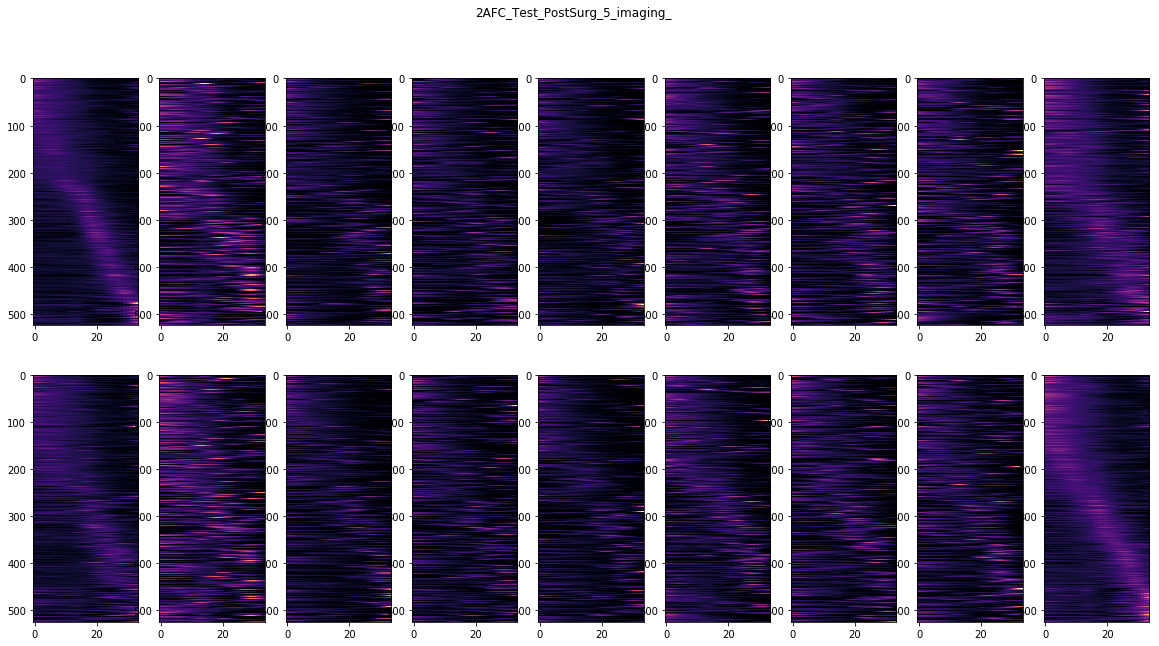

In [9]:
# plot common place cells across morphs

for i in range(len(CaFiles)):
    
    print(sessions[i])
   
    C, behavior = C_list[i], Behavior[i]
    ps, sis, frmaps = P[i],SI[i],FRmap[i]
    morphs = np.unique(behavior['morph'].values)
    common_pcs = np.where((ps[0]>.95) & (ps[1]>.95))[0]


    #FR is bin, cell, morph
    f, ax = plt.subplots(2,morphs.shape[0],figsize=[20,10])
    plt.suptitle(sessions[i])
    for ind, morph in enumerate(morphs):
        mask = behavior['morph'].values==morph 
        frmap, occupancy = utilities.rate_map(C[mask,:],behavior['position'].values[mask])
        for j in range(frmap.shape[1]):
            frmap[:,j] = gaussian_filter(frmap[:,j],2)/frmap[:,j].sum()
        if ind==0:
            FR = np.zeros([frmap.shape[0],frmap.shape[1],morphs.shape[0]])
        FR[:,:,ind] = frmap

    FR = FR[:,common_pcs,:]
    sort_0 = np.argsort(np.argmax(FR[:,:,0],axis=0))
    sort_1 = np.argsort(np.argmax(FR[:,:,-1],axis=0))
    for ind,morph in enumerate(morphs):
        ax[0,ind].imshow(FR[:,sort_0,ind].T,cmap='magma',aspect='auto')
        ax[1,ind].imshow(FR[:,sort_1,ind].T,cmap='magma',aspect='auto')


2AFC_Test_PostSurg_1_imaging_
2AFC_Test_PostSurg_2_
2AFC_Test_PostSurg_3_
2AFC_Test_PostSurg_4_imaging_
2AFC_Test_PostSurg_5_imaging_


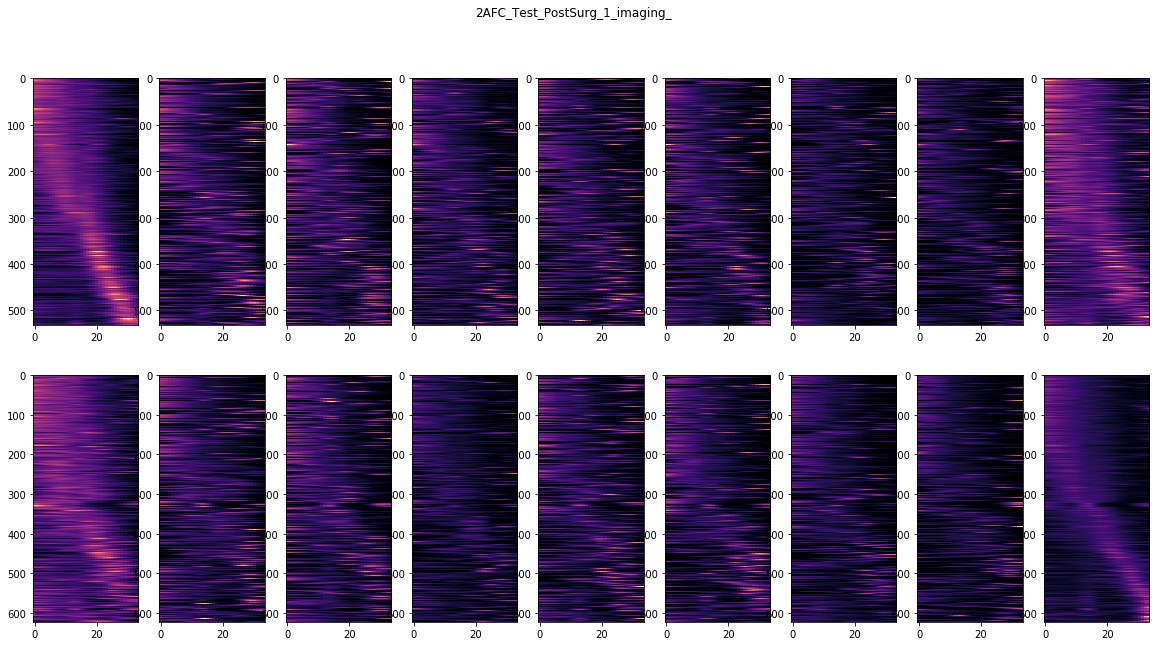

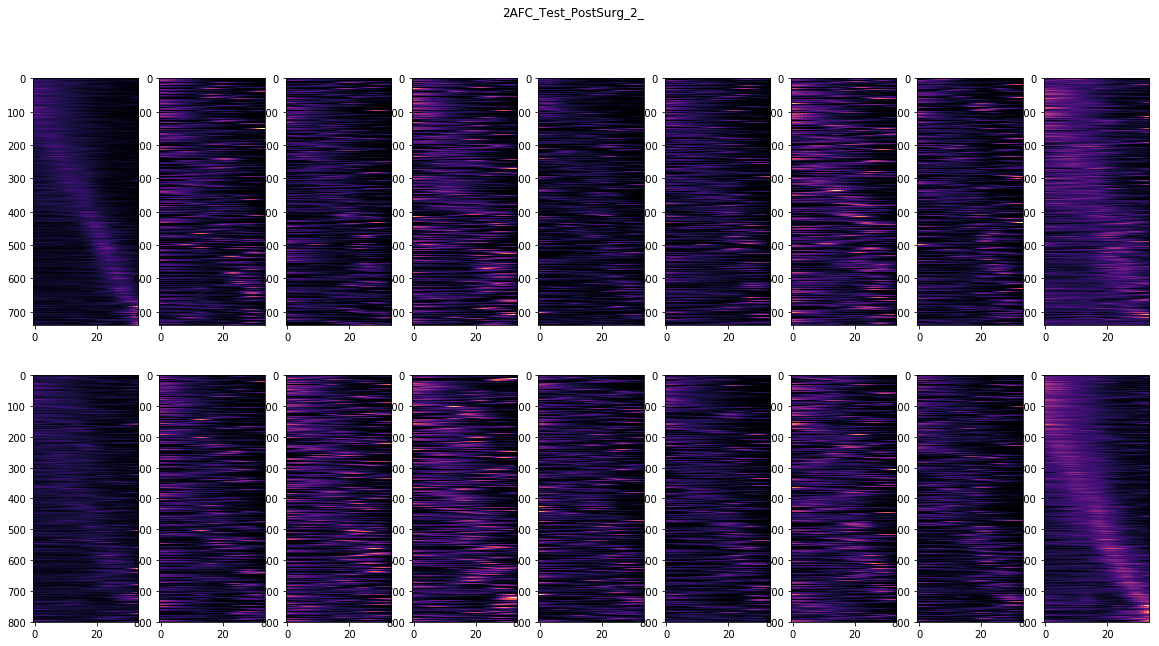

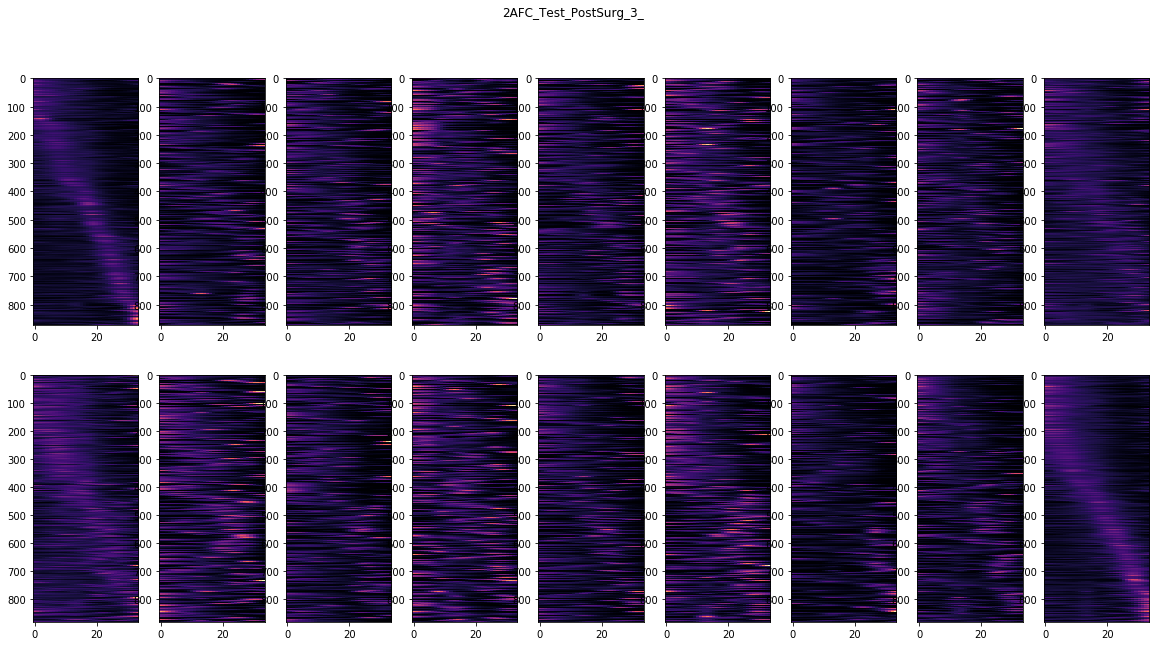

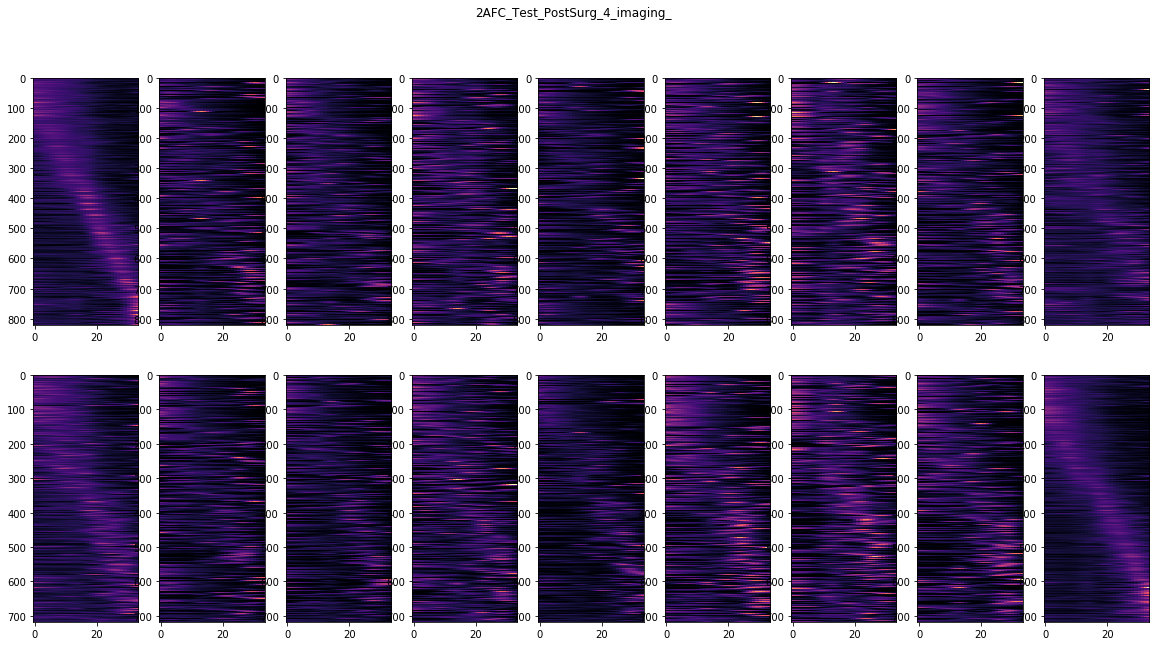

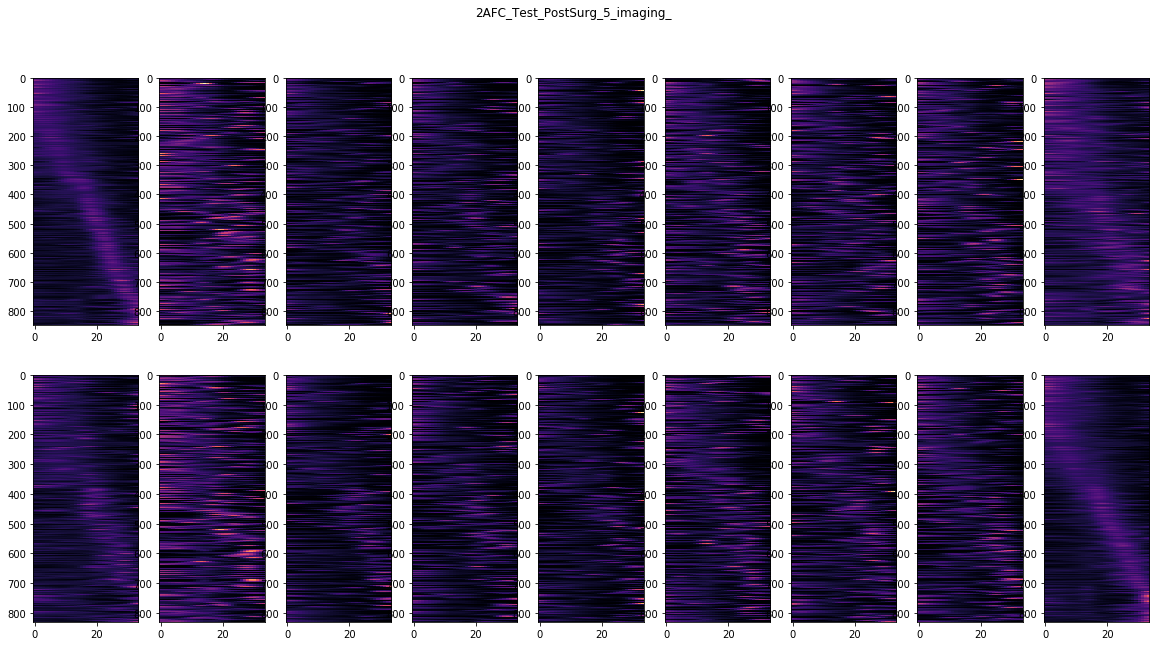

In [10]:
# sort FR maps in each morph by one context or the other
for i in range(len(CaFiles)):
    
    print(sessions[i])
    C, behavior = C_list[i], Behavior[i]
    ps, sis, frmaps = P[i],SI[i],FRmap[i]
    morphs = np.unique(behavior['morph'].values)
    pc_0, pc_1 = np.where(ps[0]>.95)[0], np.where(ps[1]>.95)[0]


    #FR is bin, cell, morph
    f, ax = plt.subplots(2,morphs.shape[0],figsize=[20,10])
    plt.suptitle(sessions[i])
    for ind, morph in enumerate(morphs):
        mask = behavior['morph'].values==morph 
        frmap, occupancy = utilities.rate_map(C[mask,:],behavior['position'].values[mask])
        for j in range(frmap.shape[1]):
            frmap[:,j] = gaussian_filter(frmap[:,j],2)/frmap[:,j].sum()
        if ind==0:
            FR = np.zeros([frmap.shape[0],frmap.shape[1],morphs.shape[0]])
        FR[:,:,ind] = frmap

    FR_0,FR_1 = FR[:,pc_0,:], FR[:,pc_1,:]
    sort_0 = np.argsort(np.argmax(FR_0[:,:,0],axis=0))
    sort_1 = np.argsort(np.argmax(FR_1[:,:,-1],axis=0))
    for ind,morph in enumerate(morphs):
        ax[0,ind].imshow(FR_0[:,sort_0,ind].T,cmap='magma',aspect='auto')
        ax[1,ind].imshow(FR_1[:,sort_1,ind].T,cmap='magma',aspect='auto')

In [11]:
# population vector analysis 
#PV_common =
for i in range(len(CaFiles)):
    #f,ax = plt.subplots(1,2)
    print(sessions[i])
    C, behavior = C_list[i], Behavior[i]
    ps, sis = P[i],SI[i]
    
    
    
    pc_any = np.where((ps[0]>.95) | (ps[1]>.95))[0]
    common_pcs = np.where((ps[0]>.95) & (ps[1]>.95))[0]
    pc_0 = np.where(ps[0]>.95)[0]
    pc_1 = np.where(ps[1]>.95)[0]
    
    
    # place cell in either context
    morphs = np.unique(Behavior[-1]['morph'].values)
    
    for ind, morph in enumerate(morphs):
        mask = behavior['morph'].values==morph 
        frmap, occupancy = utilities.rate_map(C[mask,:],behavior['position'].values[mask])
        for j in range(2): #frmap.shape[1]):
            frmap[:,j] = gaussian_filter(frmap[:,j],2)/frmap[:,j].sum()
        if ind==0:
            FR = np.zeros([frmap.shape[0],frmap.shape[1],morphs.shape[0]])
        FR[:,:,ind] = frmap
        
    #fr_either = [maps[:,pc_any] for maps in frmaps]
    pv_corr_either = np.zeros([FR.shape[0],])
    
    #fr_common = [maps[:,common_pcs] for maps in frmaps]
    pv_corr_common = np.zeros([FR.shape[0],])
    
    for j in range(FR.shape[0]):
        r_either,p = sp.stats.pearsonr(FR[j,pc_any,0],FR[j,pc_any,-1])
        pv_corr_either[j] = r_either
        
        r_common,p = sp.stats.pearsonr(FR[j,common_pcs,0],FR[j,common_pcs,-1])
        pv_corr_common[j] = r_common
    print(pv_corr_either.mean())
    print(pv_corr_common.mean())
    
    

2AFC_Test_PostSurg_1_imaging_
0.6863920466667998
0.7212485707140723
2AFC_Test_PostSurg_2_
0.594366402030345
0.6669616101836049
2AFC_Test_PostSurg_3_
0.5618277392479621
0.6191228401567203
2AFC_Test_PostSurg_4_imaging_
0.673153661813541
0.6885621605964677
2AFC_Test_PostSurg_5_imaging_
0.6253686413870375
0.6911256967987437


mean accuracy 0.437287
mean accuracy 0.525616
mean accuracy 0.513632
mean accuracy 0.418997
mean accuracy 0.485374


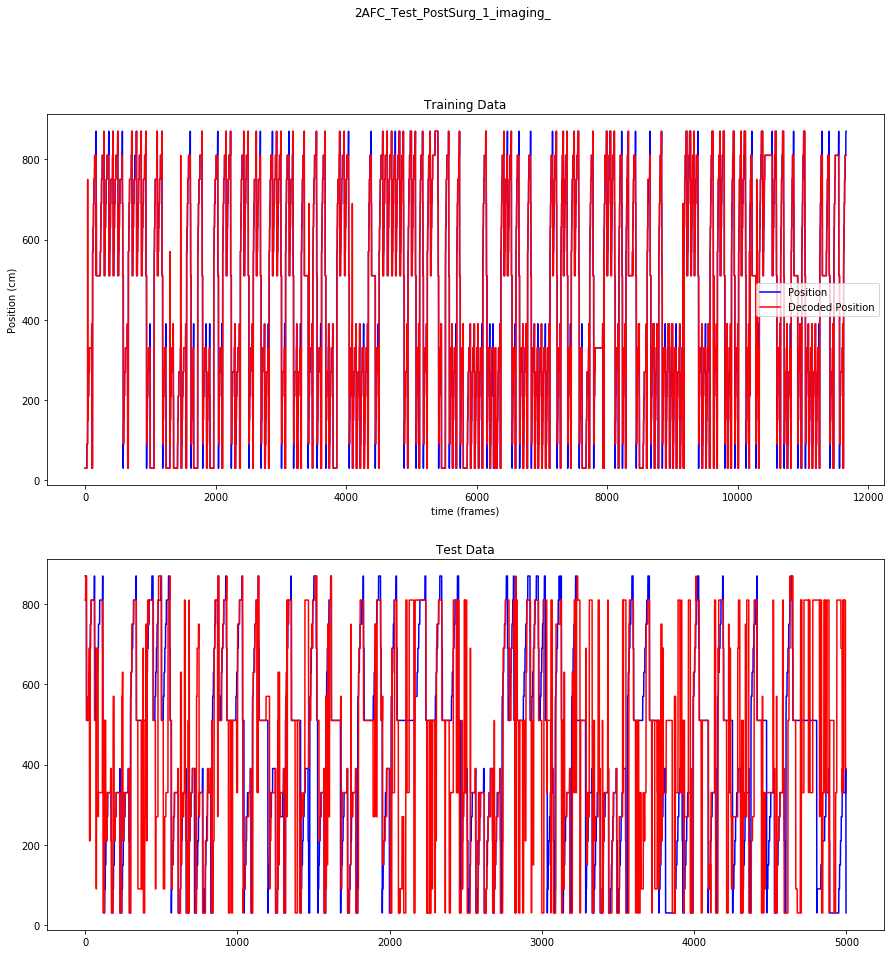

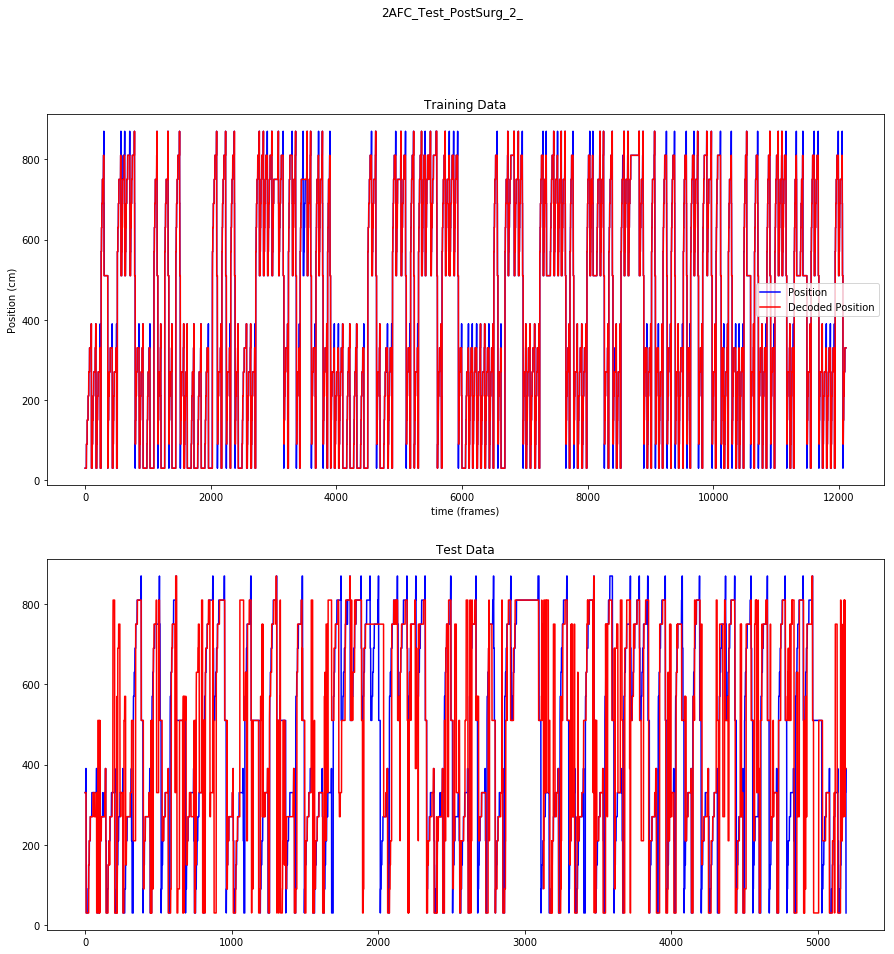

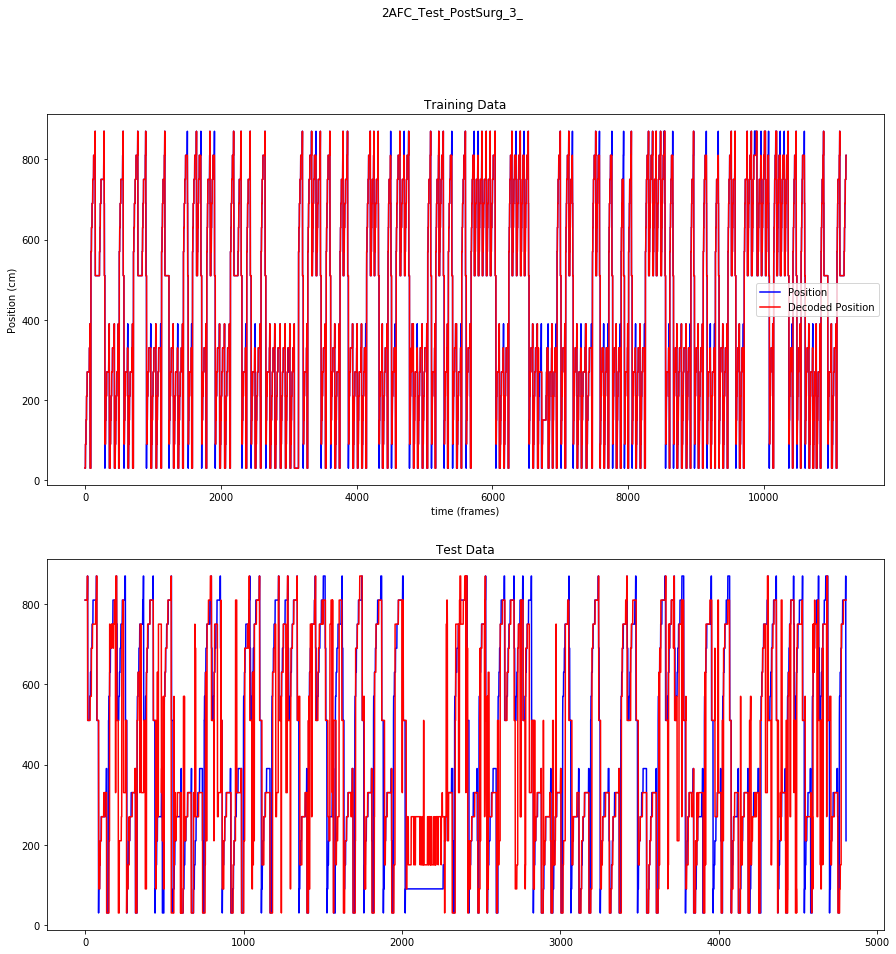

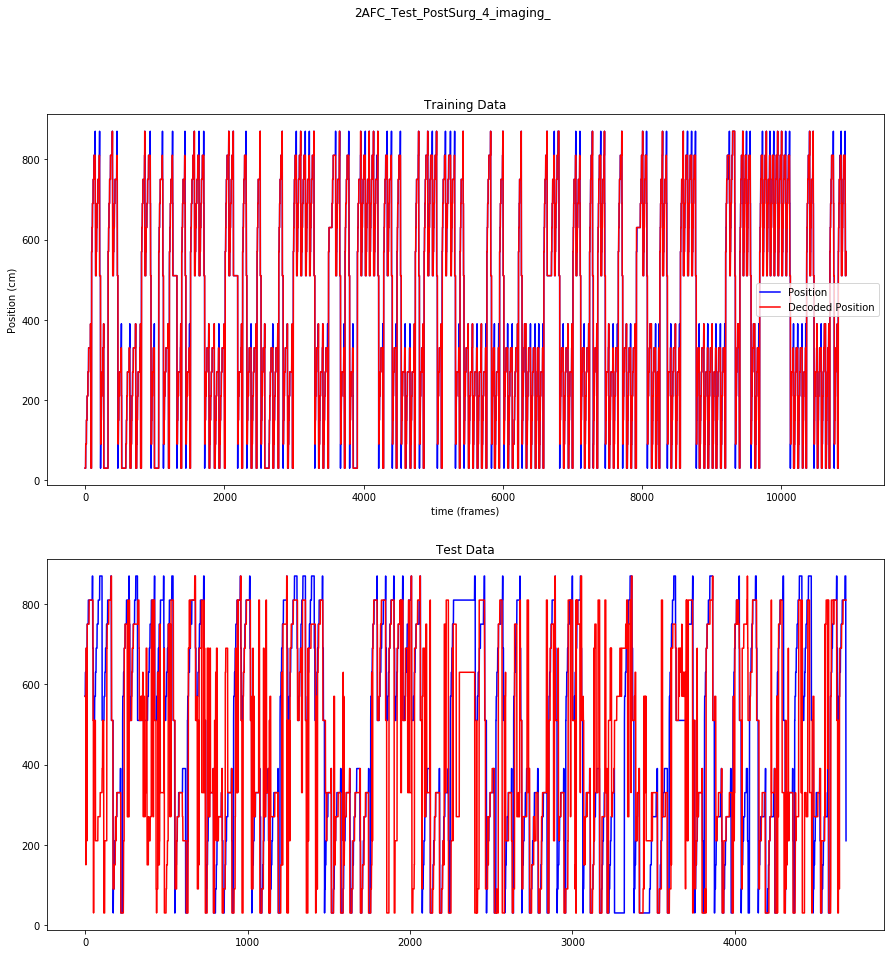

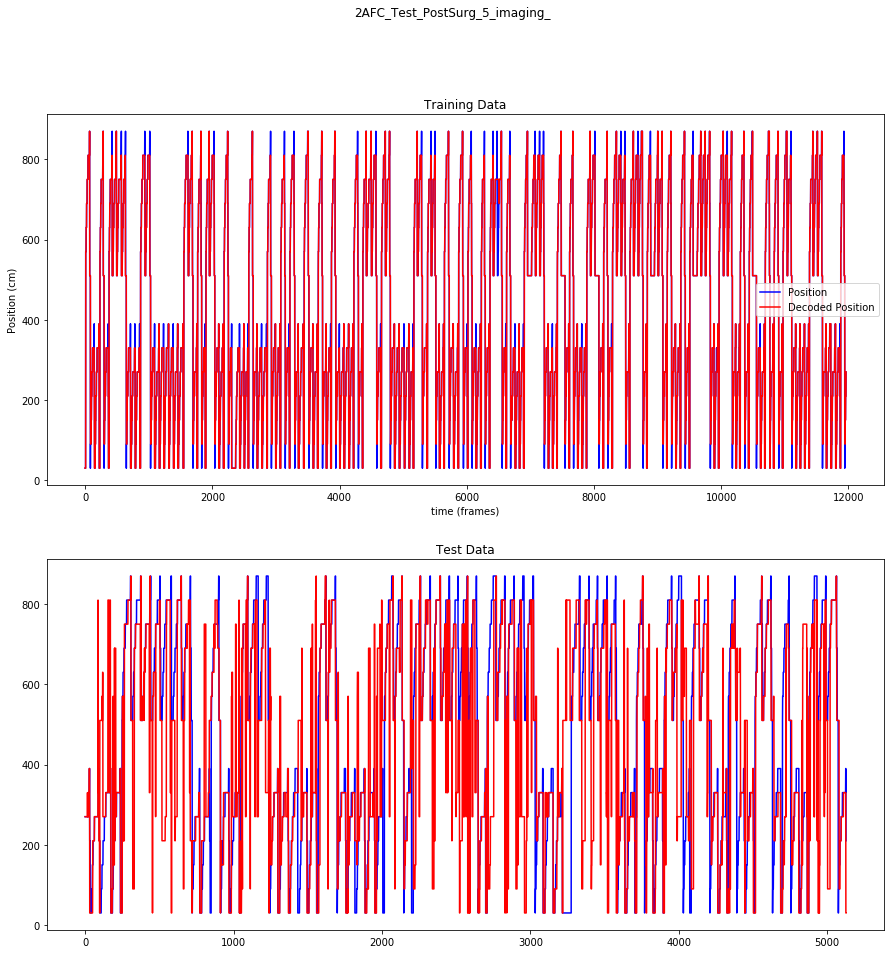

In [7]:
# Place decoding within context
#test on other context 

from sklearn.linear_model import LogisticRegression
# bin position into 10 cm bins
for i in range(len(CaFiles)):
    
    
    C_dec = sp.stats.zscore(C_list[i],axis=0)
    pos = Behavior[i]['position'].values
    context = np.round(Behavior[i]['morph'].values)
    
    pos_binned = np.zeros(pos.shape)

    bin_edges = np.arange(-60,375,60).tolist()
    bin_centers = [(bin_edges[k]+bin_edges[k+1])/2 for k in range(len(bin_edges)-1)]
    for j,(edge1,edge2) in enumerate(zip(bin_edges[:-1],bin_edges[1:])):
        pos_binned[(pos>edge1) & (pos<=edge2)] = j+1

    labels = pos_binned+ context*len(bin_edges)
    mid_point = int(C_dec.shape[0]*.7)
    LR = LogisticRegression(penalty = 'l2', solver = 'newton-cg',multi_class='multinomial',C=.001)
    LR.fit(C_dec[:mid_point,:],labels[:mid_point])


    f,ax = plt.subplots(2,1,figsize=[15,15])
    plt.suptitle(sessions[i],figure= f,size='large')
    
    ax[0].plot(60.*labels[:mid_point]-30,color='blue')
    ax[0].plot(60.*LR.predict(C_dec[:mid_point,:])-30,color='red')
    ax[0].set_title('Training Data')
    ax[0].set_ylabel('Position (cm)')
    ax[0].set_xlabel('time (frames)')
    ax[0].legend(['Position','Decoded Position'])
    pos_predict = 60.*LR.predict(C_dec[mid_point:,:])-30
    ax[1].plot(60.*labels[mid_point:]-30,color='blue')
    ax[1].plot(pos_predict,color='red')
    ax[1].set_title('Test Data')
    print('mean accuracy %f' % LR.score(C_dec[mid_point:,:], labels[mid_point:]))